In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [53]:
Image_size = 256
Batch_size = 32
Channels = 3
epochs = 50

In [9]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (Image_size, Image_size),
    batch_size = Batch_size
)

Found 2152 files belonging to 3 classes.


In [15]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [17]:
len(dataset)

68

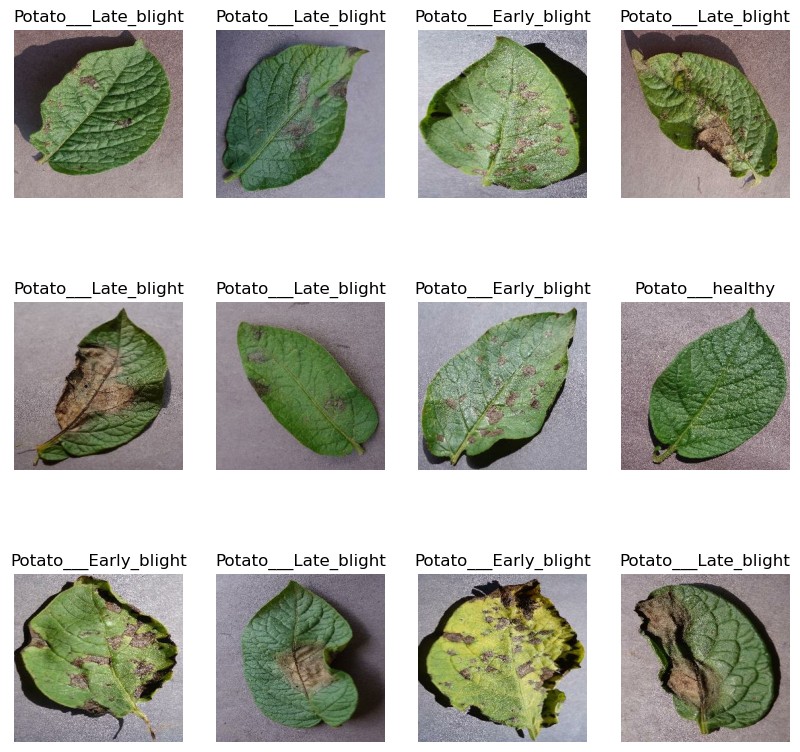

In [51]:
plt.figure(figsize = (10, 10))
for i, j in dataset.take(1):
    for k in range(12):
        ax = plt.subplot(3,4, k+1)
        plt.imshow(i[k].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[j[k]])
    #print(i[0].shape)
    #print(j.numpy())

In [55]:
len(dataset)

68

In [57]:
train_ds = dataset.take(int(len(dataset)*.8))
len(train_ds)

54

In [59]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [61]:
val_size = .1
len(dataset)*val_size

6.800000000000001

In [63]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [65]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [69]:
def get_data_partitions_tf(ds, train_split = .8, val_split = .1, test_split=.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    train_size = int(ds_size*train_split)
    val_size = int(ds_size*val_split)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [75]:
train_ds, val_ds, test_ds = get_data_partitions_tf(dataset)

In [77]:
len(train_ds)

54

In [79]:
len(val_ds)

6

In [81]:
len(test_ds)

8

In [83]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [91]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(Image_size, Image_size),
    layers.Rescaling(1.0/255)
])

In [93]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [111]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (Batch_size, Image_size, Image_size, Channels)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(3, activation = 'softmax')])
model.build(input_shape = (Batch_size, Image_size, Image_size, Channels))
                  
                  

In [113]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (32, 2304)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 64)                    │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 277,891 (1.06 MB)

 Trainable params: 277,891 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [115]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)
    

In [119]:
history = model.fit(
    train_ds,
    epochs = 50,
    batch_size = Batch_size,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.5231 - loss: 0.9020 - val_accuracy: 0.6927 - val_loss: 0.7723
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.7912 - loss: 0.5457 - val_accuracy: 0.8333 - val_loss: 0.3947
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.8422 - loss: 0.4040 - val_accuracy: 0.8958 - val_loss: 0.2867
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 169s 3s/step - accuracy: 0.8940 - loss: 0.2814 - val_accuracy: 0.9427 - val_loss: 0.1564
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2124s 40s/step - accuracy: 0.9468 - loss: 0.1407 - val_accuracy: 0.8333 - val_loss: 0.3923
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 224s 4s/step - accuracy: 0.9278 - loss: 0.1613 - val_accuracy: 0.9531 - val_loss: 0.0959
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 174s 3s/step - accuracy: 0.9520 - loss: 0.1158 - val_accuracy: 0.9635 - val_loss: 0.0888
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accuracy: 0.9600 - loss: 0.1099 - val_accuracy: 0.8385 -

In [123]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 635ms/step - accuracy: 0.9967 - loss: 0.0113


In [125]:
scores


[0.023955902084708214, 0.9921875]

In [127]:
history


In [129]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [131]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [135]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

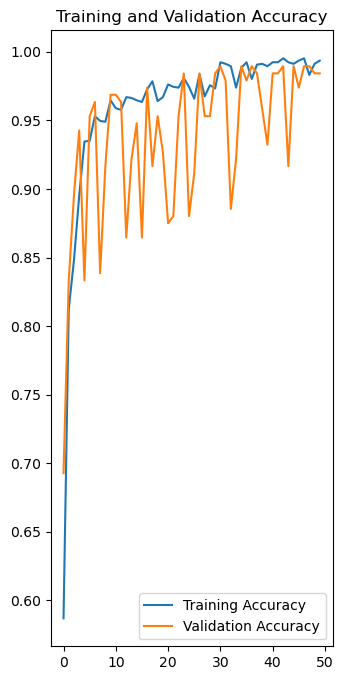

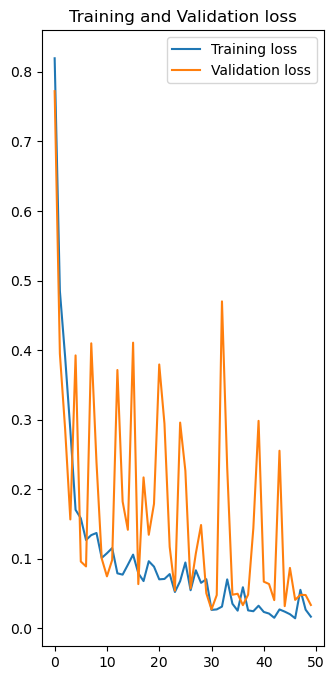

In [143]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label = 'Training Accuracy')
plt.plot(range(epochs), val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), loss, label = 'Training loss')
plt.plot(range(epochs), val_loss, label = 'Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')

First image to predict
Actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
Predicted label: Potato___Late_blight


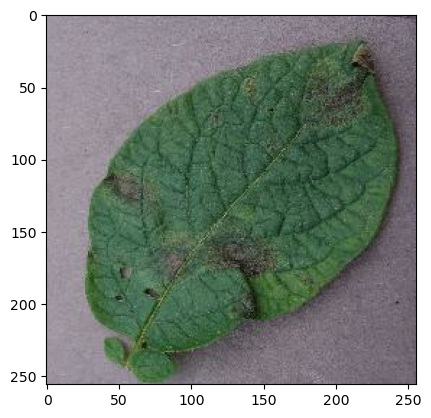

In [157]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = class_names[labels_batch[0].numpy()]
    print('First image to predict')
    plt.imshow(first_image)
    print("Actual label:", first_label)
    batch_prediction = model.predict(images_batch)
    print('Predicted label:', class_names[np.argmax(batch_prediction[0])])

In [159]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[i])]
    confidence = round(100*(np.max(predictions[i])),2)
    return predicted_class, confidence
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


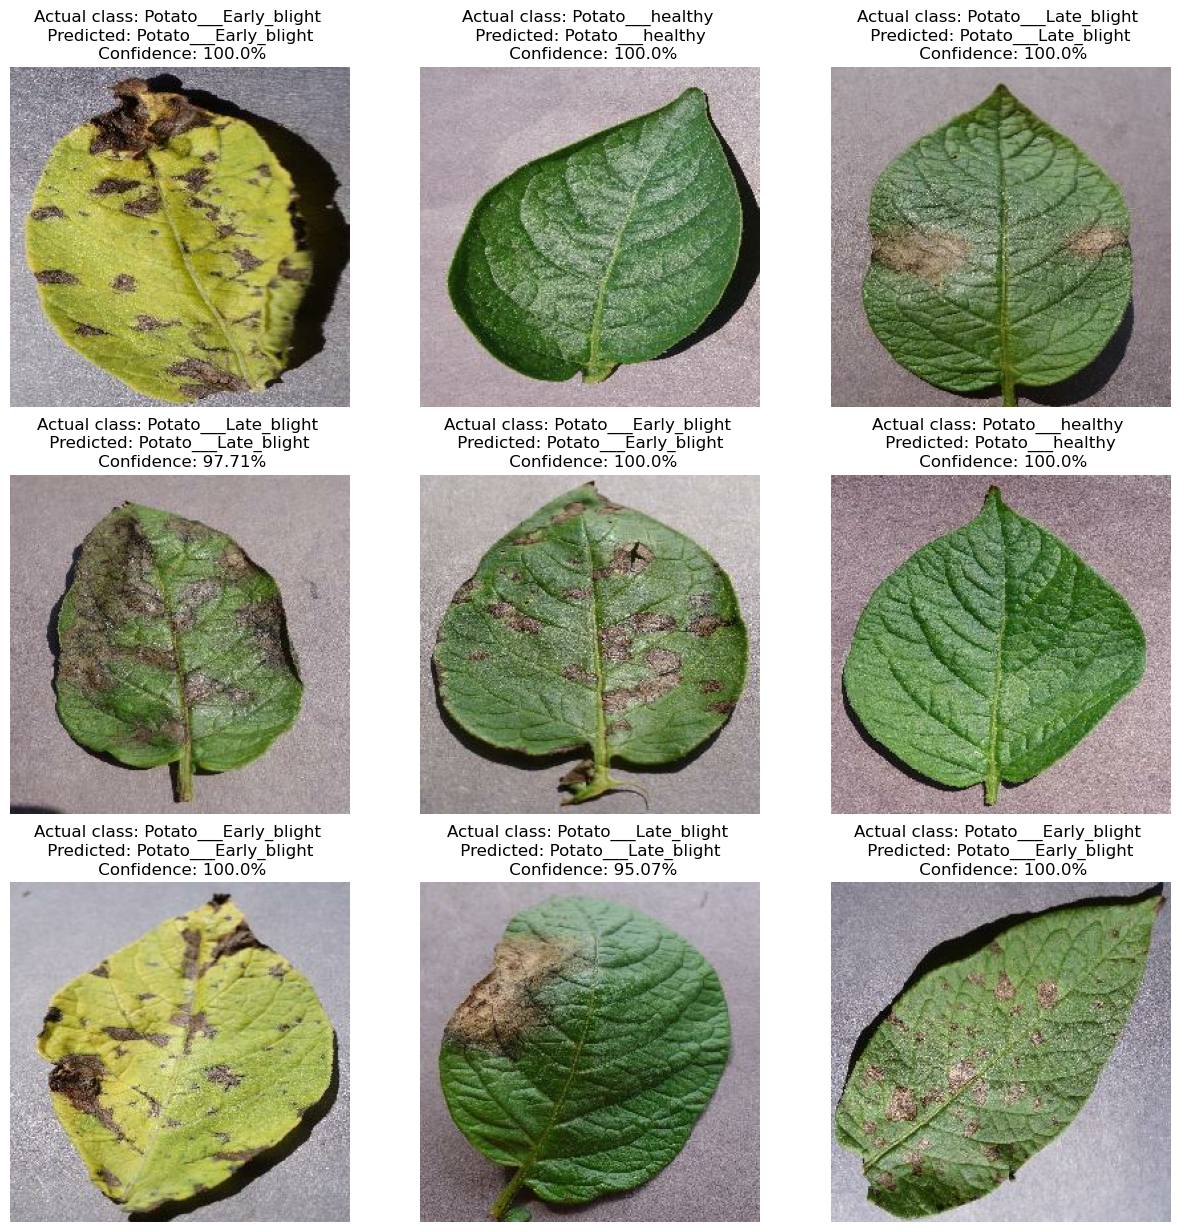

In [173]:
plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class, confidence = predict(model, images[i].numpy())

        actual_class = class_names[labels[i]]

        plt.title(f"Actual class: {actual_class} \n Predicted: {predicted_class} \n Confidence: {confidence}%")

        plt.axis('off')

In [185]:
model_version = 1
model.save(f"C:/Users/godar/Downloads/Potato Disease model/model/{model_version}.keras")